In [3]:
# Load dependences
import gpxpy
import pandas as pd
import os
import sys
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [4]:
# Path
path = os.path.dirname('__file__')

In [5]:
# Read data
def read_gpx(file: str) -> pd.DataFrame:
    df = None
    points = []
    with open(file) as f:
        gpx = gpxpy.parse(f)
    for segment in gpx.tracks[0].segments:
        for p in segment.points:
            points.append({
                'time': p.time,
                'latitude': p.latitude,
                'Longitude': p. longitude,
                'elevation': p.elevation
            })
    df = pd.DataFrame.from_records(points)
    return df

In [6]:
# Read as dataframes
data_path_dic = {
    'recovery_01': os.path.join(path, './data_raw/recovery.01-Mar-2022-1533.gpx'),
    'recovery_05': os.path.join(path, './data_raw/recovery.05-Mar-2022.1025.gpx'),
    'recovery_25': os.path.join(path, './data_raw/recovery.25-May-2022-0907.gpx')
}

df_01 = read_gpx(data_path_dic["recovery_01"])
df_05 = read_gpx(data_path_dic["recovery_05"])
df_25 = read_gpx(data_path_dic["recovery_25"])

In [7]:
df_01.head()

,time,latitude,Longitude,elevation
0,2022-03-01 20:33:48+00:00,6.297476,-75.578192,1668.879307
1,2022-03-01 20:33:49+00:00,6.297476,-75.578146,1668.386143
2,2022-03-01 20:33:57+00:00,6.297460,-75.578169,1667.904453


In [8]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                        
---  ------     --------------  -----                        
 0   time       3 non-null      datetime64[ns, SimpleTZ("Z")]
 1   latitude   3 non-null      float64                      
 2   Longitude  3 non-null      float64                      
 3   elevation  3 non-null      float64                      
dtypes: datetime64[ns, SimpleTZ("Z")](1), float64(3)
memory usage: 224.0 bytes


In [9]:
df_05.head()

,time,latitude,Longitude,elevation
0,2022-03-04 00:04:34+00:00,6.180893,-75.577296,1589.639492
1,2022-03-04 00:04:35+00:00,6.180912,-75.577295,1588.165859
2,2022-03-04 00:04:43+00:00,6.180921,-75.577312,1591.435879
3,2022-03-04 00:04:46+00:00,6.180897,-75.577270,1587.116055
4,2022-03-04 00:04:48+00:00,6.180874,-75.577276,1586.772305


In [10]:
df_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18593 entries, 0 to 18592
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                        
---  ------     --------------  -----                        
 0   time       18593 non-null  datetime64[ns, SimpleTZ("Z")]
 1   latitude   18593 non-null  float64                      
 2   Longitude  18593 non-null  float64                      
 3   elevation  18593 non-null  float64                      
dtypes: datetime64[ns, SimpleTZ("Z")](1), float64(3)
memory usage: 581.2 KB


In [11]:
df_05[df_05.duplicated(['latitude'])]

,time,latitude,Longitude,elevation
38,2022-03-04 00:21:03+00:00,6.180957,-75.577246,1606.784512
42,2022-03-04 00:21:15+00:00,6.180921,-75.577201,1606.262051
62,2022-03-04 00:22:21+00:00,6.180770,-75.577141,1601.305996
157,2022-03-04 00:32:01+00:00,6.180868,-75.577183,1589.329678
257,2022-03-04 00:38:12+00:00,6.180882,-75.577014,1566.878750
...,...,...,...,...
17858,2022-03-05 14:19:17+00:00,6.265207,-75.591524,1502.883579
18129,2022-03-05 14:31:57+00:00,6.260172,-75.588852,1485.919712
18353,2022-03-05 14:40:30+00:00,6.254302,-75.590716,1478.987217
18419,2022-03-05 14:44:51+00:00,6.255013,-75.591135,1478.726109


In [12]:
df_25.head()

,time,latitude,Longitude,elevation
0,2022-05-25 21:24:46.433000+00:00,6.208559,-75.571630,1558.78
1,2022-05-26 14:05:32.284000+00:00,6.268901,-75.593216,1548.51
2,2022-05-26 14:05:34+00:00,6.268870,-75.593087,1551.91
3,2022-05-26 14:05:36+00:00,6.268792,-75.593007,1551.53
4,2022-05-26 14:05:37+00:00,6.268722,-75.592900,1551.37


In [13]:
df_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype                        
---  ------     --------------  -----                        
 0   time       658 non-null    datetime64[ns, SimpleTZ("Z")]
 1   latitude   658 non-null    float64                      
 2   Longitude  658 non-null    float64                      
 3   elevation  658 non-null    float64                      
dtypes: datetime64[ns, SimpleTZ("Z")](1), float64(3)
memory usage: 20.7 KB


In [22]:
# # initialize the map and store it in a m object
# m = folium.Map(location=[40, -95], zoom_start=20)

# # show the map
# m

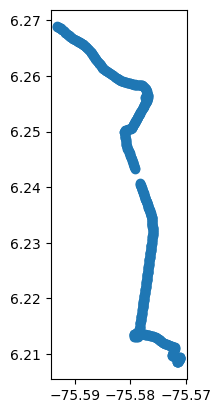

In [15]:
#Creating a geodataframe
points = gpd.points_from_xy(df_25["Longitude"], df_25["latitude"])
map = gpd.GeoDataFrame (df_25, geometry=points) 
map.plot()

plt.show()

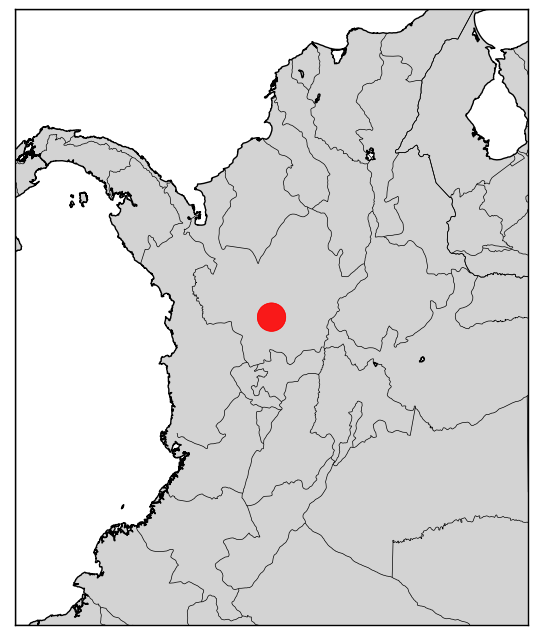

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

data = df_01

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=data['latitude'].mean(), lon_0=data['Longitude'].mean(),
            width=1e6, height=1.2e6)

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='white')

x, y = m(data['Longitude'].values, data['latitude'].values)
m.scatter(x, y, s=data['elevation'].values, c='red', alpha=0.5, marker='.', linewidth=0.5)

plt.show()

In [25]:
data = df_01

print('elevation',data['elevation'].min(),data['elevation'].max())
print('latitude',data['latitude'].min(),data['latitude'].max())
print('longitude',data['Longitude'].min(),data['Longitude'].max())

elevation 1667.904453277588 1668.879306793213
latitude 6.297460352076494 6.297476068144941
longitude -75.5781921186257 -75.57814610197728
